In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [149]:
#Read into the Amazon csv file
df = pd.read_csv('AMZN.csv', parse_dates=['Date'])
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1    1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2    1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3    1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4    1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...         ...         ...         ...         ...         ...         ...   
6679 2023-11-29  147.850006  148.539993  145.970001  146.320007  146.320007   
6680 2023-11-30  144.759995  146.929993  144.330002  146.089996  146.089996   
6681 2023-12-01  146.000000  147.250000  145.550003  147.029999  147.029999   
6682 2023-12-04  145.250000  145.350006  142.809998  144.839996  144.839996   
6683 2023-12-05  143.550003  148.570007  143.130005  146.880005  146.880005   

          Volume  
0     1443120000  
1      294000

In [150]:
#Trim the data down to only Date and Close columns and a timeframe of 5 years
df_trim = df.drop(columns=['Open','High','Low','Volume','Adj Close'])
start = (np.where(df['Date'] == dt.datetime(2015, 1, 2))[0])[0]
start
end = (np.where(df['Date'] == dt.datetime(2019, 12, 31))[0])[0]+1
df_trim = df_trim[start:end]
print(df_trim)

           Date      Close
4437 2015-01-02  15.426000
4438 2015-01-05  15.109500
4439 2015-01-06  14.764500
4440 2015-01-07  14.921000
4441 2015-01-08  15.023000
...         ...        ...
5690 2019-12-24  89.460503
5691 2019-12-26  93.438499
5692 2019-12-27  93.489998
5693 2019-12-30  92.344498
5694 2019-12-31  92.391998

[1258 rows x 2 columns]


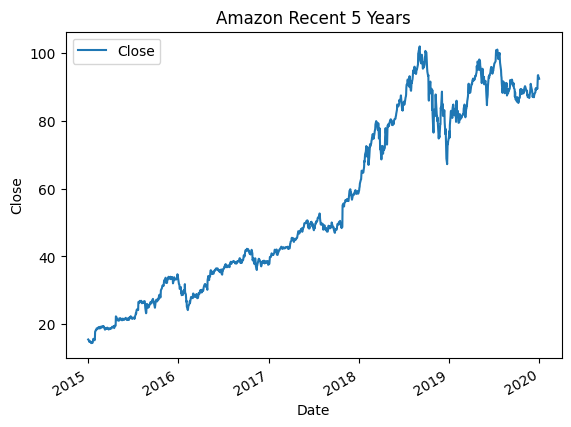

In [152]:
#Plot the trimmed data
df_trim.plot(title= 'Amazon Recent 5 Years', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.savefig('AmazonRecent5Years.png')
plt.show()

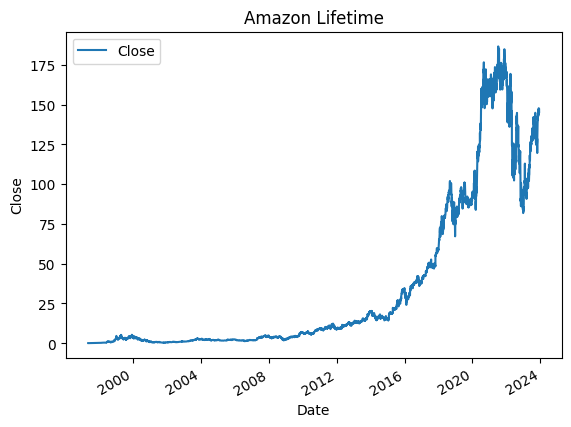

In [154]:
df_lifetime = df.drop(columns=['Open','High','Low','Volume','Adj Close'])
df_lifetime.plot(title= 'Amazon Lifetime', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [155]:
df_lifetime['Daily Percent Change'] = df['Close'].pct_change()
print(df_lifetime)

           Date       Close  Daily Percent Change
0    1997-05-15    0.097917                   NaN
1    1997-05-16    0.086458             -0.117028
2    1997-05-19    0.085417             -0.012041
3    1997-05-20    0.081771             -0.042685
4    1997-05-21    0.071354             -0.127392
...         ...         ...                   ...
6679 2023-11-29  146.320007             -0.004829
6680 2023-11-30  146.089996             -0.001572
6681 2023-12-01  147.029999              0.006434
6682 2023-12-04  144.839996             -0.014895
6683 2023-12-05  146.880005              0.014085

[6684 rows x 3 columns]


In [156]:
#Create a new column for the Daily Percent Change throughout the 5 years
df_trim['Daily Percent Change'] = df['Close'].pct_change()
print(df_trim)

           Date      Close  Daily Percent Change
4437 2015-01-02  15.426000             -0.005897
4438 2015-01-05  15.109500             -0.020517
4439 2015-01-06  14.764500             -0.022833
4440 2015-01-07  14.921000              0.010600
4441 2015-01-08  15.023000              0.006836
...         ...        ...                   ...
5690 2019-12-24  89.460503             -0.002114
5691 2019-12-26  93.438499              0.044467
5692 2019-12-27  93.489998              0.000551
5693 2019-12-30  92.344498             -0.012253
5694 2019-12-31  92.391998              0.000514

[1258 rows x 3 columns]


The 4 quarters for each year

In [166]:
#Create new dataframes for each quarter of the year
df_trim_Q = df_trim
df_trim_Q['Quarter'] = df_trim['Date'].dt.quarter
df_trim_Q1s = df_trim_Q[df_trim_Q['Quarter'] == 1]
print(df_trim_Q1s)

df_trim_Q2s = df_trim_Q[df_trim_Q['Quarter'] == 2]
print(df_trim_Q2s)

df_trim_Q3s = df_trim_Q[df_trim_Q['Quarter'] == 3]
print(df_trim_Q3s)

df_trim_Q4s = df_trim_Q[df_trim_Q['Quarter'] == 4]
print(df_trim_Q4s)

           Date      Close  Daily Percent Change  Quarter
4437 2015-01-02  15.426000             -0.005897        1
4438 2015-01-05  15.109500             -0.020517        1
4439 2015-01-06  14.764500             -0.022833        1
4440 2015-01-07  14.921000              0.010600        1
4441 2015-01-08  15.023000              0.006836        1
...         ...        ...                   ...      ...
5499 2019-03-25  88.712997              0.005377        1
5500 2019-03-26  89.188004              0.005354        1
5501 2019-03-27  88.285004             -0.010125        1
5502 2019-03-28  88.670998              0.004372        1
5503 2019-03-29  89.037498              0.004133        1

[306 rows x 4 columns]
           Date      Close  Daily Percent Change  Quarter
4498 2015-04-01  18.513000             -0.004945        2
4499 2015-04-02  18.612499              0.005375        2
4500 2015-04-06  18.851999              0.012868        2
4501 2015-04-07  18.720501             -0.006975

In [164]:
#Get the P-Value of the first quarters
tstatQ1, pvalueQ1 = stats.ttest_ind(df_trim_Q1s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ1)

0.6224919526369664


In [165]:
#P-Values for 2nd, 3rd, and 4th quarters
tstatQ2, pvalueQ2 = stats.ttest_ind(df_trim_Q2s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ2)

tstatQ3, pvalueQ3 = stats.ttest_ind(df_trim_Q3s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ3)

tstatQ4, pvalueQ4 = stats.ttest_ind(df_trim_Q4s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ4)

0.595881576841684
0.8289235122885795
0.4359256576442988


In [169]:
#Create a new dataframe called df_QGroup with time period, average daily percent change and p-value difference from overall
df_QGroup = pd.DataFrame({"Time Period": ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4", "Overall"],
                          "Average Daily Percent Change": [df_trim_Q1s['Daily Percent Change'].mean(),
                                                           df_trim_Q2s['Daily Percent Change'].mean(),
                                                           df_trim_Q3s['Daily Percent Change'].mean(),
                                                           df_trim_Q4s['Daily Percent Change'].mean(),
                                                           df_trim['Daily Percent Change'].mean()],
                          "p-value difference from overall": [pvalueQ1, pvalueQ2, pvalueQ3, pvalueQ4, None]},
                         index = ["1", "2", "3", "4", "5"])
print(df_QGroup)

  Time Period  Average Daily Percent Change  p-value difference from overall
1   Quarter 1                      0.002178                         0.622492
2   Quarter 2                      0.002188                         0.595882
3   Quarter 3                      0.001345                         0.828924
4   Quarter 4                      0.000656                         0.435926
5     Overall                      0.001587                              NaN


Plot the Average Daily Percent Change

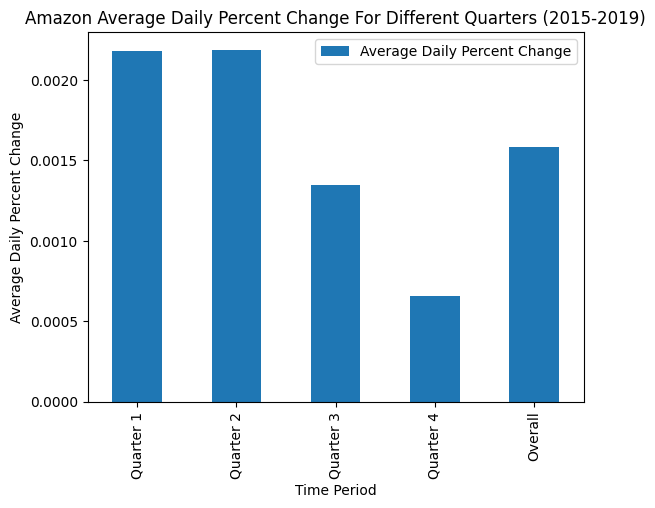

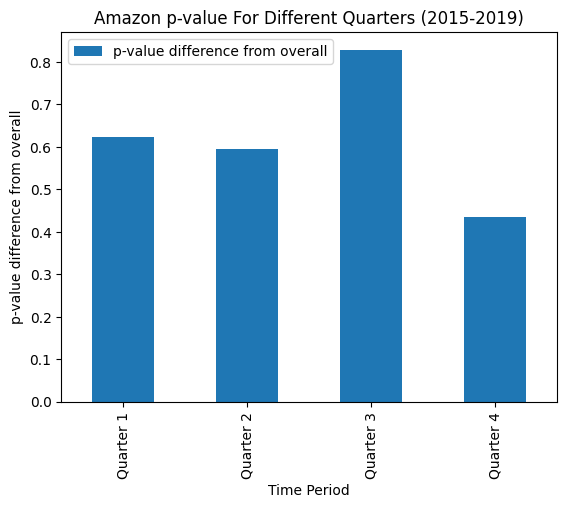

In [170]:
#Plot the average daily percent change and another graph for the P-Values
df_QGroup.plot(title= 'Amazon Average Daily Percent Change For Different Quarters (2015-2019)',x='Time Period', y='Average Daily Percent Change', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Average Daily Percent Change')
plt.savefig('AmazonAverageDailyPercentChangeForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

df_QGroup[0:4].plot(title= 'Amazon p-value For Different Quarters (2015-2019)',x='Time Period', y='p-value difference from overall', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('p-value difference from overall')
plt.savefig('AmazonP-ValueForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

Let's get a table of df_QGroup without any axis tick marks

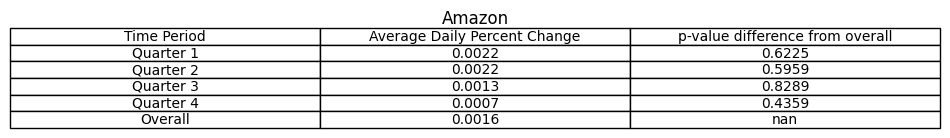

In [171]:
#Table of the new dataframe "df_QGroup"
plt.figure(figsize=(12,1.2))
plt.table(cellText=df_QGroup.round(4).values, colLabels=df_QGroup.columns, loc = 'center', cellLoc= 'center')
plt.title('Amazon')
plt.axis('off')
plt.savefig('AmazonTable.png', bbox_inches = "tight")
plt.show()

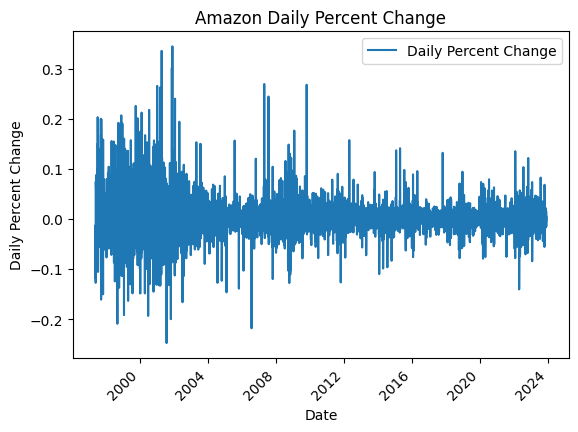

In [ ]:
df_lifetime.plot(title= 'Amazon Daily Percent Change', x='Date', y='Daily Percent Change')
plt.xlabel('Date')
plt.ylabel('Daily Percent Change')
plt.xticks(rotation=45)
plt.show()

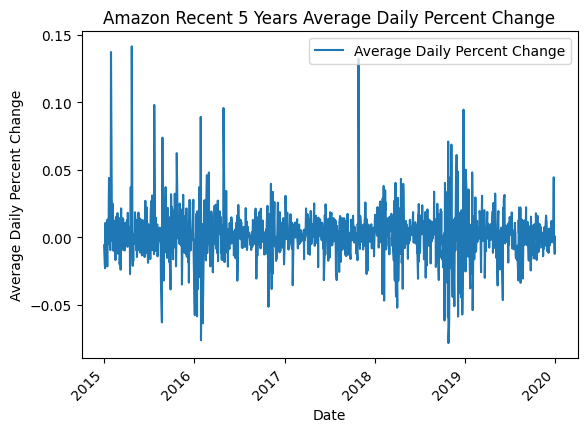

In [ ]:
df_trim.plot(title= 'Amazon Recent 5 Years Average Daily Percent Change', x='Date', y='Average Daily Percent Change')
plt.xlabel('Date')
plt.ylabel('Average Daily Percent Change')
plt.xticks(rotation=45)
plt.show()

First quartile of average daily percent change

In [ ]:
df_lifetime['Average Daily Percent Change'].quantile(0.25)

-0.013192832361847928

In [ ]:
df_trim['Average Daily Percent Change'].quantile(0.25)

-0.011023552062076725

Scatter plot of average daily percent change

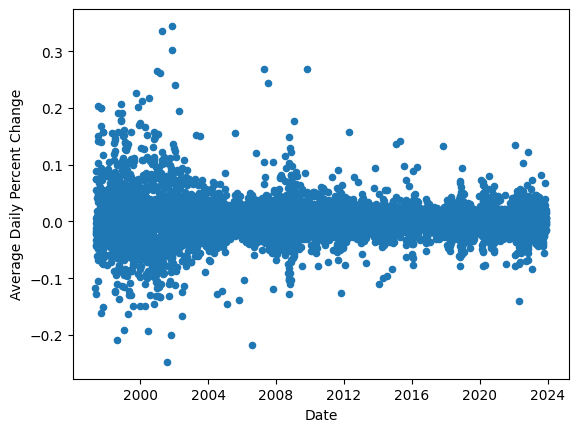

In [ ]:
df_lifetime.plot(x='Date', y='Average Daily Percent Change', kind='scatter')
plt.xlabel('Date')
plt.ylabel('Average Daily Percent Change')
plt.show()

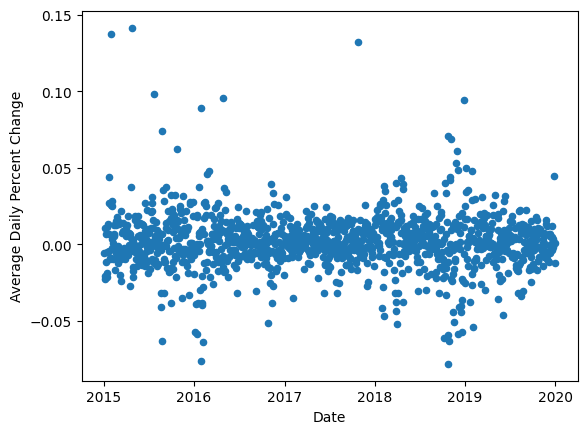

In [ ]:
df_trim.plot(x='Date', y='Average Daily Percent Change', kind='scatter')
plt.xlabel('Date')
plt.ylabel('Average Daily Percent Change')
plt.show()

Box and whisker plot of average daily percent change

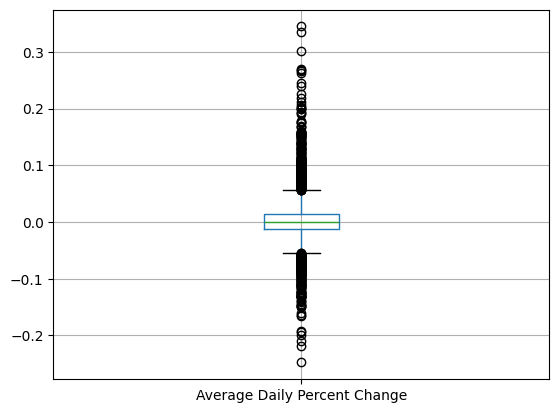

In [ ]:
df_lifetime.boxplot(column='Average Daily Percent Change')
plt.show()

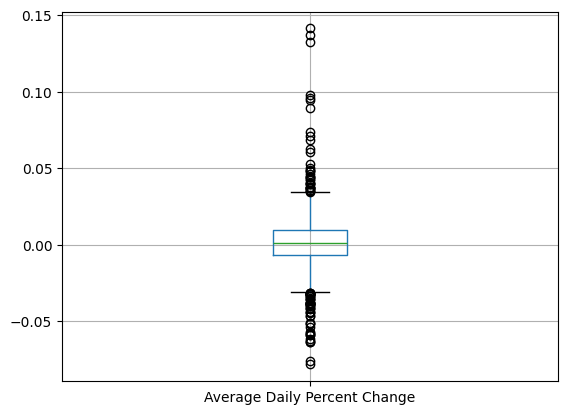

In [ ]:
df_trim.boxplot(column='Average Daily Percent Change')
plt.show()

The mean, standard deviation, minimum, first quartile, the median, the third quartile and average.

In [ ]:
print(df_lifetime.describe())

         Adj Close  Average Daily Percent Change
count  6684.000000                   6683.000000
mean     34.020316                      0.001723
std      49.829566                      0.035778
min       0.069792                     -0.247661
25%       2.042500                     -0.013193
50%       7.104750                      0.000444
75%      45.135750                      0.014821
max     186.570496                      0.344714


In [ ]:
print(df_trim.describe())

         Adj Close  Average Daily Percent Change
count  1259.000000                   1259.000000
mean    126.623075                      0.000656
std      31.647644                      0.022583
min      67.197998                     -0.140494
25%      94.959999                     -0.011024
50%     125.928497                      0.000982
75%     158.086998                      0.012175
max     186.570496                      0.135359


It may not be efficient to analyze the lifetime of Amazon stocks, so we need to narrow it down even more, perhaps down to 1 specific year

Let's see how Amazon did during the height of the pandemic vs the year prior to the pandemic happening

In [ ]:
df_pandemic = df[df['Date'].str.contains('2020')]
df_pandemic = df_pandemic.drop(columns=['Open','High','Low','Volume','Close'])
df_pandemic['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_pandemic)

            Date   Adj Close  Average Daily Percent Change
5695  2020-01-02   94.900497                      0.027151
5696  2020-01-03   93.748497                     -0.012139
5697  2020-01-06   95.143997                      0.014886
5698  2020-01-07   95.343002                      0.002092
5699  2020-01-08   94.598503                     -0.007809
...          ...         ...                           ...
5943  2020-12-24  158.634506                     -0.003949
5944  2020-12-28  164.197998                      0.035071
5945  2020-12-29  166.100006                      0.011584
5946  2020-12-30  164.292496                     -0.010882
5947  2020-12-31  162.846497                     -0.008801

[253 rows x 3 columns]


In [ ]:
df_nopandemic = df[df['Date'].str.contains('2018')]
df_nopandemic = df_nopandemic.drop(columns=['Open','High','Low','Volume','Close'])
df_nopandemic['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_nopandemic)

            Date  Adj Close  Average Daily Percent Change
5192  2018-01-02  59.450500                      0.016708
5193  2018-01-03  60.209999                      0.012775
5194  2018-01-04  60.479500                      0.004476
5195  2018-01-05  61.457001                      0.016163
5196  2018-01-08  62.343498                      0.014425
...          ...        ...                           ...
5438  2018-12-24  67.197998                     -0.024313
5439  2018-12-26  73.544998                      0.094452
5440  2018-12-27  73.082001                     -0.006295
5441  2018-12-28  73.901001                      0.011207
5442  2018-12-31  75.098503                      0.016204

[251 rows x 3 columns]


Let's compare the graphs of the two datas

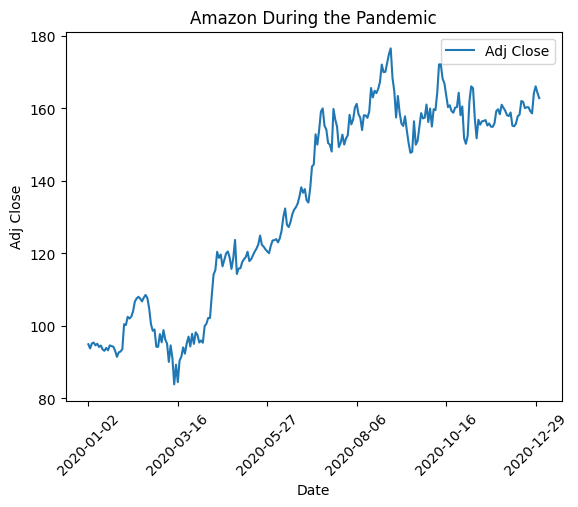

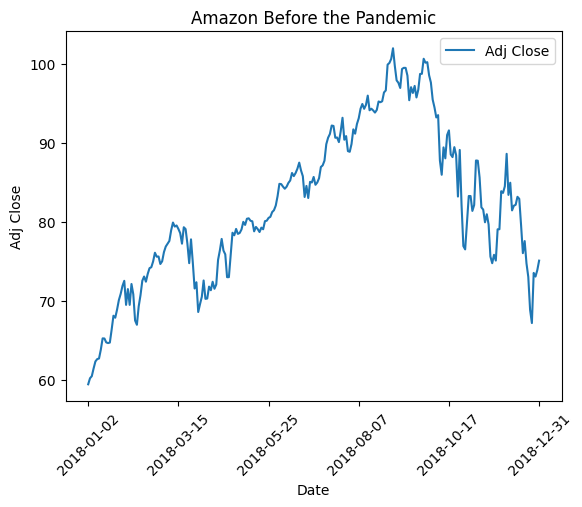

In [ ]:
df_pandemic.plot(title= 'Amazon During the Pandemic', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_nopandemic.plot(title= 'Amazon Before the Pandemic', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

Notice that Amazon have increasing significantly during the heigh of the pandemic, this can be due to the need of masks or other hygenic products to prevent the spread of Covid

Let's see how Amazon do during holidays now, we will beging with a popular one: Christmas. We will analyze +/- 5 days (10 days total) from Christmas to see if there is any difference compared to non-holidays, like 10 days in september.

In [ ]:
df_christmas = df[5939:5949]
df_christmas = df_christmas.drop(columns=['Open','High','Low','Volume','Close'])
df_christmas['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_christmas)

df_september = df[5868:5878]
df_september = df_september.drop(columns=['Open','High','Low','Volume','Close'])
df_september['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_september)

df_october = df[5894:5904]
df_october = df_october.drop(columns=['Open','High','Low','Volume','Close'])
df_october['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_october)

            Date   Adj Close  Average Daily Percent Change
5939  2020-12-18  160.082504                     -0.010639
5940  2020-12-21  160.309006                      0.001415
5941  2020-12-22  160.326004                      0.000106
5942  2020-12-23  159.263504                     -0.006627
5943  2020-12-24  158.634506                     -0.003949
5944  2020-12-28  164.197998                      0.035071
5945  2020-12-29  166.100006                      0.011584
5946  2020-12-30  164.292496                     -0.010882
5947  2020-12-31  162.846497                     -0.008801
5948  2021-01-04  159.331497                     -0.021585
            Date   Adj Close  Average Daily Percent Change
5868  2020-09-09  163.430496                      0.037707
5869  2020-09-10  158.755493                     -0.028605
5870  2020-09-11  155.811005                     -0.018547
5871  2020-09-14  155.148499                     -0.004252
5872  2020-09-15  157.806503                      0.0171

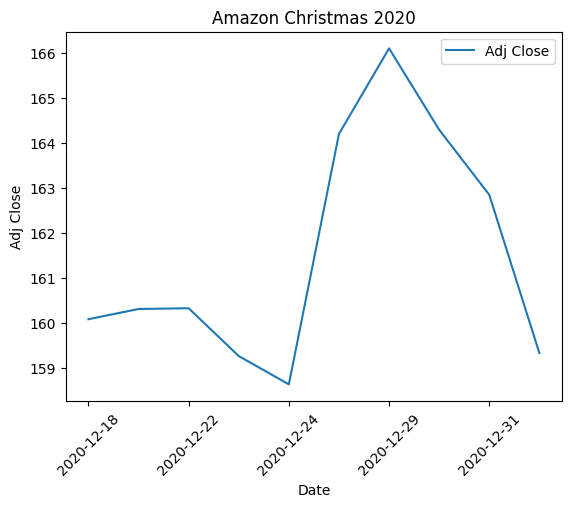

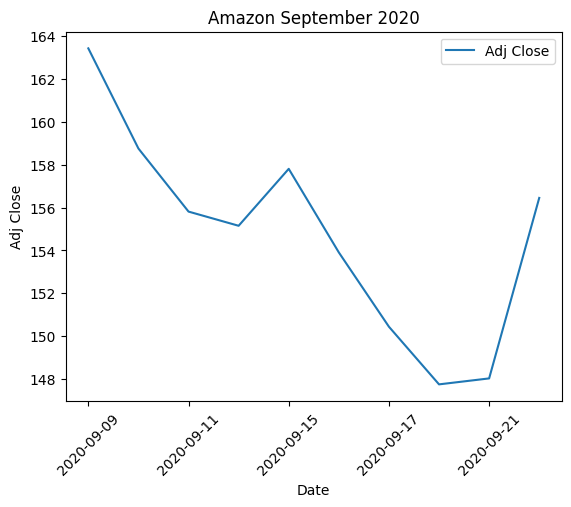

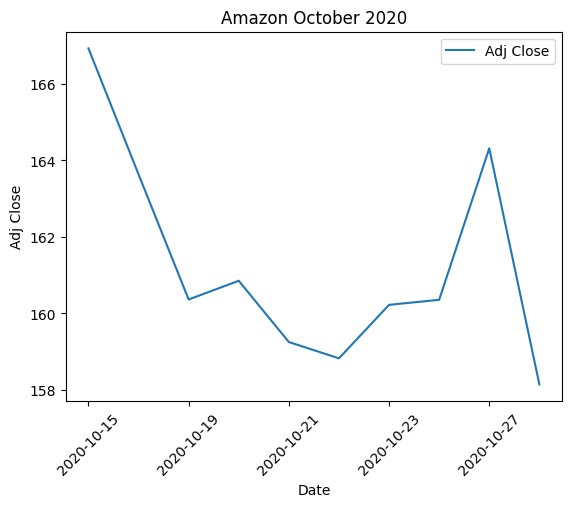

In [ ]:
df_christmas.plot(title= 'Amazon Christmas 2020', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_september.plot(title= 'Amazon September 2020', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_october.plot(title= 'Amazon October 2020', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

Notice the massive spike that is very near Christmas, this can be due to the large amount of people that wants to utilize Amazon's service to celebrate Christmas.

In [ ]:
df_monthDecember = df[df['Date'].str.contains('2020-12')]
df_monthDecember = df_monthDecember.drop(columns=['Open','High','Low','Volume','Close'])
df_monthDecember['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_monthDecember)

            Date   Adj Close  Average Daily Percent Change
5926  2020-12-01  161.003998                      0.016427
5927  2020-12-02  160.176498                     -0.005140
5928  2020-12-03  159.336502                     -0.005244
5929  2020-12-04  158.128998                     -0.007578
5930  2020-12-07  157.899994                     -0.001448
5931  2020-12-08  158.864502                      0.006108
5932  2020-12-09  155.210007                     -0.023004
5933  2020-12-10  155.074493                     -0.000873
5934  2020-12-11  155.820999                      0.004814
5935  2020-12-14  157.848495                      0.013012
5936  2020-12-15  158.255997                      0.002582
5937  2020-12-16  162.048004                      0.023961
5938  2020-12-17  161.804001                     -0.001506
5939  2020-12-18  160.082504                     -0.010639
5940  2020-12-21  160.309006                      0.001415
5941  2020-12-22  160.326004                      0.0001

In [ ]:
df_monthOctober = df[df['Date'].str.contains('2020-10')]
df_monthOctober = df_monthOctober.drop(columns=['Open','High','Low','Volume','Close'])
df_monthOctober['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_monthOctober)

            Date   Adj Close  Average Daily Percent Change
5884  2020-10-01  161.063004                      0.023035
5885  2020-10-02  156.250000                     -0.029883
5886  2020-10-05  159.960007                      0.023744
5887  2020-10-06  154.998001                     -0.031020
5888  2020-10-07  159.784500                      0.030881
5889  2020-10-08  159.527496                     -0.001608
5890  2020-10-09  164.332504                      0.030120
5891  2020-10-12  172.146500                      0.047550
5892  2020-10-13  172.181503                      0.000203
5893  2020-10-14  168.185501                     -0.023208
5894  2020-10-15  166.932495                     -0.007450
5895  2020-10-16  163.635498                     -0.019750
5896  2020-10-19  160.360504                     -0.020014
5897  2020-10-20  160.850494                      0.003056
5898  2020-10-21  159.246994                     -0.009969
5899  2020-10-22  158.820007                     -0.0026

In [ ]:
df_monthSeptember = df[df['Date'].str.contains('2020-09')]
df_monthSeptember = df_monthSeptember.drop(columns=['Open','High','Low','Volume','Close'])
df_monthSeptember['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_monthSeptember)

            Date   Adj Close  Average Daily Percent Change
5863  2020-09-01  174.955994                      0.013955
5864  2020-09-02  176.572495                      0.009239
5865  2020-09-03  168.399994                     -0.046284
5866  2020-09-04  164.731003                     -0.021787
5867  2020-09-08  157.492004                     -0.043944
5868  2020-09-09  163.430496                      0.037707
5869  2020-09-10  158.755493                     -0.028605
5870  2020-09-11  155.811005                     -0.018547
5871  2020-09-14  155.148499                     -0.004252
5872  2020-09-15  157.806503                      0.017132
5873  2020-09-16  153.904999                     -0.024723
5874  2020-09-17  150.436493                     -0.022537
5875  2020-09-18  147.745499                     -0.017888
5876  2020-09-21  148.023499                      0.001882
5877  2020-09-22  156.449493                      0.056923
5878  2020-09-23  149.992996                     -0.0412

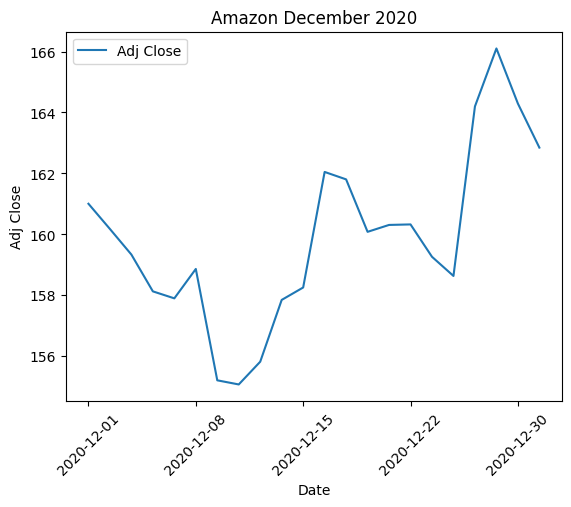

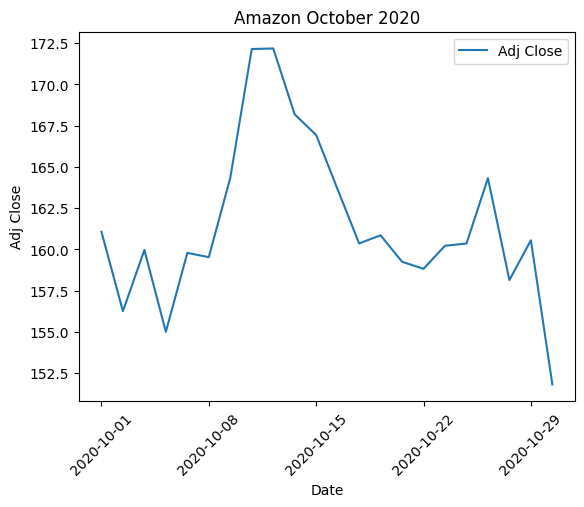

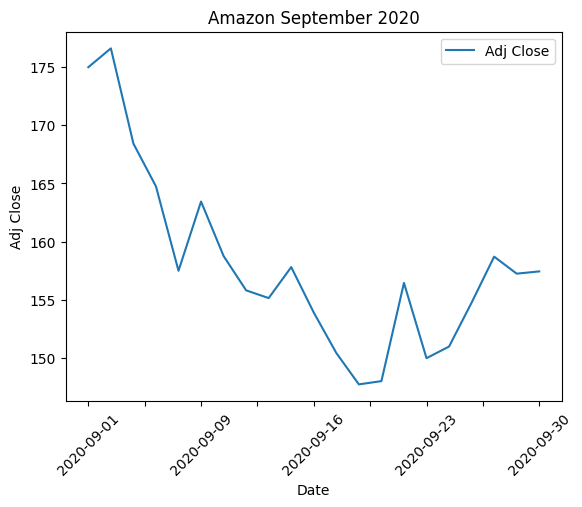

In [ ]:
df_monthDecember.plot(title= 'Amazon December 2020', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_monthOctober.plot(title= 'Amazon October 2020', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_monthSeptember.plot(title= 'Amazon September 2020', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_2018Christmas = df[5434:5444]
df_2018Christmas = df_2018Christmas.drop(columns=['Open','High','Low','Volume','Close'])
df_2018Christmas['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_2018Christmas)

df_2018September = df[5367:5377]
df_2018September = df_2018September.drop(columns=['Open','High','Low','Volume','Close'])
df_2018September['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_2018September)

df_2018October = df[5388:5398]
df_2018October = df_2018October.drop(columns=['Open','High','Low','Volume','Close'])
df_2018October['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_2018October)

            Date  Adj Close  Average Daily Percent Change
5434  2018-12-18  77.573997                      0.020100
5435  2018-12-19  74.753998                     -0.036352
5436  2018-12-20  73.041496                     -0.022909
5437  2018-12-21  68.872498                     -0.057077
5438  2018-12-24  67.197998                     -0.024313
5439  2018-12-26  73.544998                      0.094452
5440  2018-12-27  73.082001                     -0.006295
5441  2018-12-28  73.901001                      0.011207
5442  2018-12-31  75.098503                      0.016204
5443  2019-01-02  76.956497                      0.024741
            Date  Adj Close  Average Daily Percent Change
5367  2018-09-12  99.500000                      0.001434
5368  2018-09-13  99.493500                     -0.000065
5369  2018-09-14  98.509499                     -0.009890
5370  2018-09-17  95.401497                     -0.031550
5371  2018-09-18  97.052498                      0.017306
5372  2018-09-

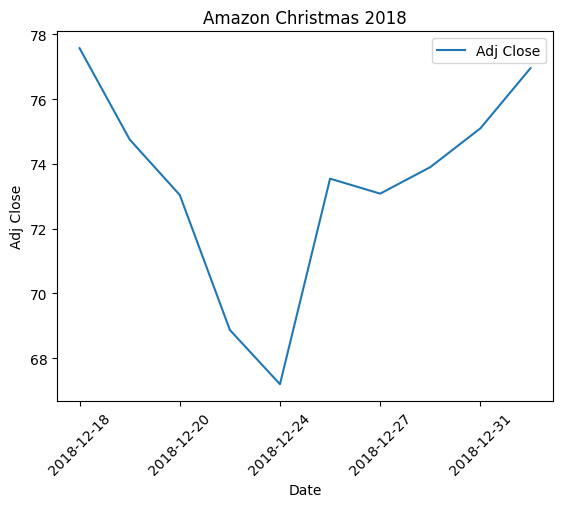

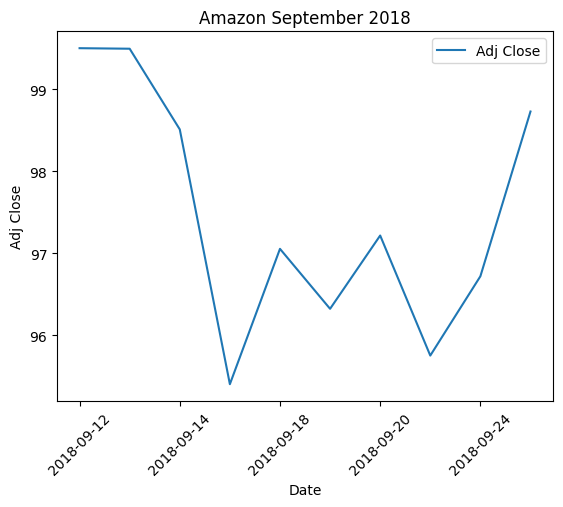

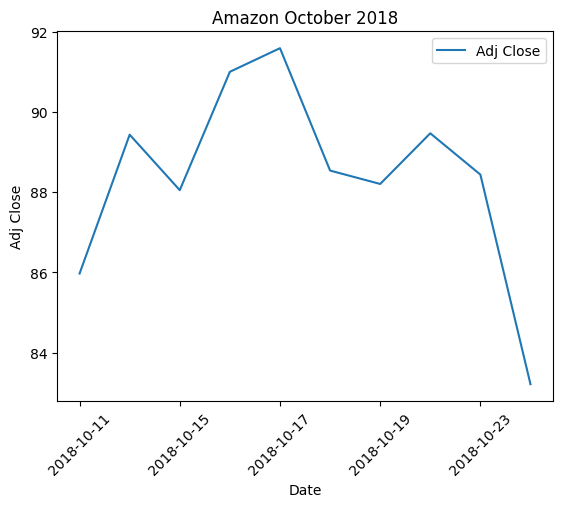

In [ ]:
df_2018Christmas.plot(title= 'Amazon Christmas 2018', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_2018September.plot(title= 'Amazon September 2018', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)

df_2018October.plot(title= 'Amazon October 2018', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

A similar trend can be observed during 2018, prior to the pandemic

In [ ]:
df_2018DecemberMonth = df[df['Date'].str.contains('2018-12')]
df_2018DecemberMonth = df_2018DecemberMonth.drop(columns=['Open','High','Low','Volume','Close'])
df_2018DecemberMonth['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_2018DecemberMonth)

df_2018OctoberMonth = df[df['Date'].str.contains('2018-10')]
df_2018OctoberMonth = df_2018OctoberMonth.drop(columns=['Open','High','Low','Volume','Close'])
df_2018OctoberMonth['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_2018OctoberMonth)

df_2018SeptemberMonth = df[df['Date'].str.contains('2018-09')]
df_2018SeptemberMonth = df_2018SeptemberMonth.drop(columns=['Open','High','Low','Volume','Close'])
df_2018SeptemberMonth['Average Daily Percent Change'] = df['Adj Close'].pct_change()
print(df_2018SeptemberMonth)

            Date  Adj Close  Average Daily Percent Change
5424  2018-12-03  88.617996                      0.048628
5425  2018-12-04  83.419998                     -0.058656
5426  2018-12-06  84.959503                      0.018455
5427  2018-12-07  81.456497                     -0.041231
5428  2018-12-10  82.051498                      0.007305
5429  2018-12-11  82.162003                      0.001347
5430  2018-12-12  83.177002                      0.012354
5431  2018-12-13  82.918999                     -0.003102
5432  2018-12-14  79.595497                     -0.040081
5433  2018-12-17  76.045502                     -0.044600
5434  2018-12-18  77.573997                      0.020100
5435  2018-12-19  74.753998                     -0.036352
5436  2018-12-20  73.041496                     -0.022909
5437  2018-12-21  68.872498                     -0.057077
5438  2018-12-24  67.197998                     -0.024313
5439  2018-12-26  73.544998                      0.094452
5440  2018-12-

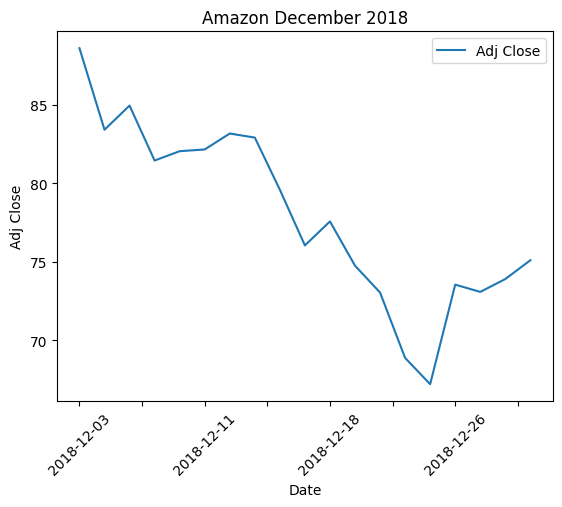

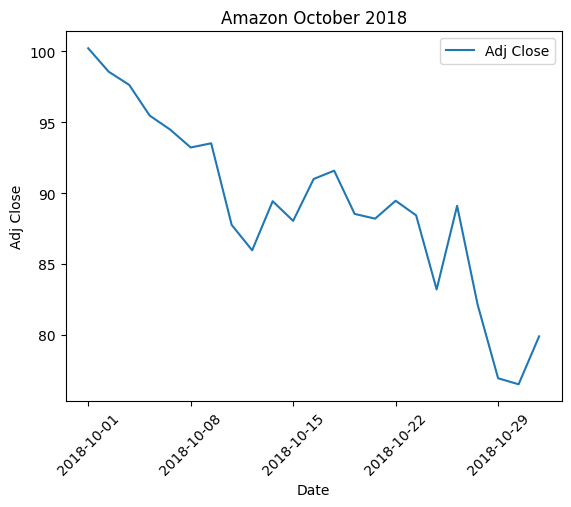

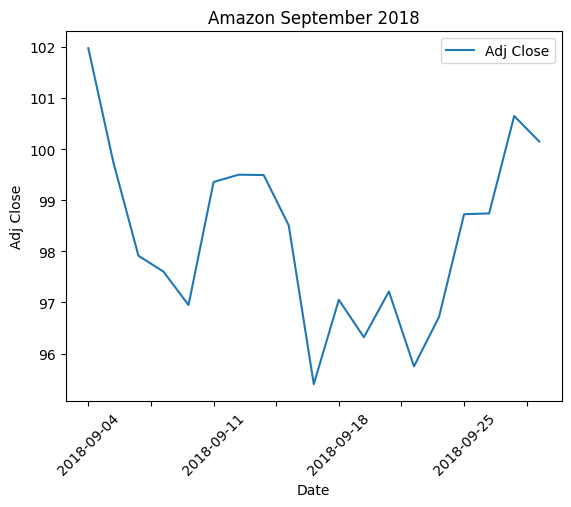

In [ ]:
df_2018DecemberMonth.plot(title= 'Amazon December 2018', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()

df_2018OctoberMonth.plot(title= 'Amazon October 2018', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)

df_2018SeptemberMonth.plot(title= 'Amazon September 2018', x='Date', y='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xticks(rotation=45)
plt.show()